In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reviews_df = pd.read_csv('total_reviews.csv')
additional_reviews = pd.read_csv('reviews_scrape_5.csv')

In [3]:
reviews_df = reviews_df.append(additional_reviews)

In [4]:
reviews_df.shape

(4745, 10)

In [5]:
reviews_df = reviews_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [6]:
reviews_df

,asin,product,date,verified,title,desc,reviewer_name,rating
0,B08267BBJT,Size: AAA,"August 11, 2020",Verified Purchase,"\nDidn't work, then worked, now don't work aga...",\n\n All I got in terms of use out of these b...,Jasmine Carroll,1.0
1,B08267BBJT,Size: AAA,"July 30, 2020",Verified Purchase,\nThese absolutely suck\n,\n\n I bought these for a wall mounted magnif...,Ashlee M.,1.0
2,B08268F6XN,Size: AA,"July 19, 2020",Verified Purchase,\nlonger lasting battery for remote controller...,\n\n i like the constant voltage and hopefull...,ARCHANGEL TROY,5.0
3,B08267BBJT,Size: AAA,"July 18, 2020",Verified Purchase,\nMinimal plastic in packaging.\n,"\n\n Just received these today, but I’m revie...",ira,5.0
4,B08267BBJT,Size: AAA,"July 17, 2020",Verified Purchase,\nNot long enough battery life for a night hike\n,\n\n Shuts off suddenly in headlamp\n\n,T,3.0
...,...,...,...,...,...,...,...,...
1925,B00HZV9WTM,Style: BatteriesSize: AAA 8 Pack,"December 10, 2018",Verified Purchase,\nBatteries advertised as charged. Totally de...,\n\n Totally dead when I received the batteri...,William M.,2.0
1926,B00HZV9WTM,Style: BatteriesSize: AA 4 Pack,"December 10, 2018",Verified Purchase,\nGreat\n,\n\n Got the new silver ones. The older black...,David S.,5.0
1927,B00HZV9WTM,Style: BatteriesSize: AA 8 Pack,"December 10, 2018",Verified Purchase,\nGood batteries but quality control lacking\n,\n\n Out of 8 batteries in the pack i ordered...,Ethan Banks,5.0
1928,B00HZV9WTM,Style: BatteriesSize: AA 8 Pack,"December 9, 2018",Verified Purchase,\nGreat battery\n,\n\n Solid performance\n\n,stangcolts,5.0


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 1929
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           4745 non-null   object 
 1   product        3991 non-null   object 
 2   date           4745 non-null   object 
 3   verified       4745 non-null   object 
 4   title          4745 non-null   object 
 5   desc           4745 non-null   object 
 6   reviewer_name  4745 non-null   object 
 7   rating         4745 non-null   float64
dtypes: float64(1), object(7)
memory usage: 333.6+ KB


### Remove 'new line' string ("\n")

In [8]:
reviews_df['title'] = reviews_df['title'].str.replace('\n', '')

In [9]:
reviews_df['desc'] = reviews_df['desc'].str.replace('\n','')

In [2]:
def cleaned_reviews_dataframe(reviews_df):
    reviews_df['title'] = reviews_df['title'].str.replace('\n', '')
    reviews_df['desc'] = reviews_df['desc'].str.replace('\n','')
    reviews_df['title_desc'] = reviews_df['title'] + reviews_df['desc']
    if 'Unnamed: 0' in set(reviews_df.columns):
        reviews_df = reviews_df.drop('Unnamed: 0', axis=1)
    return reviews_df

In [5]:
gaming_headset = pd.read_csv('../data/gaming_headset_reviews.csv')

In [6]:
cleaned_gaming_headset = cleaned_reviews_dataframe(gaming_headset)

In [7]:
cleaned_gaming_headset

,asin,product,date,verified,title,desc,reviewer_name,rating,title_desc
0,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"August 24, 2020",Verified Purchase,Not for sound hoarding,Theyre not good. They look nice but the soun...,Archon,2.0,Not for sound hoarding Theyre not good. They ...
1,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"August 24, 2020",Verified Purchase,Forget about Buying These Headphones,Bought HyperX Cloud Stinger at discount duri...,zeeinAZ,1.0,Forget about Buying These Headphones Bought H...
2,B01L2ZRYVE,Style: Stinger Core Wireless 7.1Pattern Name: ...,"August 23, 2020",Verified Purchase,Dead on arrival.,Dead on arrival. Thought they needed a charg...,Brandon,1.0,Dead on arrival. Dead on arrival. Thought the...
3,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"August 23, 2020",Verified Purchase,Satisfied gamer,My son loved it.,Colleen liljenquist,5.0,Satisfied gamer My son loved it.
4,B01L2ZRYVE,Style: Stinger Core 7.1Pattern Name: Gaming He...,"August 23, 2020",Verified Purchase,Beats most expensive gaming headsets.,HyperCloud is the only gaming headset compan...,Hunter Seitz,5.0,Beats most expensive gaming headsets. HyperCl...
...,...,...,...,...,...,...,...,...,...
1715,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"December 29, 2018",Verified Purchase,DO NOT BUY,The mic broke after a 2 months DO NOT BUY,Caleb O.,1.0,DO NOT BUY The mic broke after a 2 months DO ...
1716,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"December 28, 2018",Not Verified,crap,"broke within a month, you need an adapter to...",JenH,1.0,"crap broke within a month, you need an adapte..."
1717,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"December 28, 2018",Verified Purchase,Awesome bro of bros,"Man, for the price, you can’t beat these hea...",Jab Roni,5.0,"Awesome bro of bros Man, for the price, you c..."
1718,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"December 28, 2018",Verified Purchase,Max volume could be better,"Got the headset, really liked how easy it is...",R13,3.0,"Max volume could be better Got the headset, r..."


,asin,product,date,verified,title,desc,reviewer_name,rating,title_desc
0,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"August 24, 2020",Verified Purchase,Not for sound hoarding,Theyre not good. They look nice but the soun...,Archon,2.0,Not for sound hoarding Theyre not good. They ...
1,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"August 24, 2020",Verified Purchase,Forget about Buying These Headphones,Bought HyperX Cloud Stinger at discount duri...,zeeinAZ,1.0,Forget about Buying These Headphones Bought H...
2,B01L2ZRYVE,Style: Stinger Core Wireless 7.1Pattern Name: ...,"August 23, 2020",Verified Purchase,Dead on arrival.,Dead on arrival. Thought they needed a charg...,Brandon,1.0,Dead on arrival. Dead on arrival. Thought the...
3,B01L2ZRYVE,Style: StingerPattern Name: Gaming Headset,"August 23, 2020",Verified Purchase,Satisfied gamer,My son loved it.,Colleen liljenquist,5.0,Satisfied gamer My son loved it.
4,B01L2ZRYVE,Style: Stinger Core 7.1Pattern Name: Gaming He...,"August 23, 2020",Verified Purchase,Beats most expensive gaming headsets.,HyperCloud is the only gaming headset compan...,Hunter Seitz,5.0,Beats most expensive gaming headsets. HyperCl...


### Remove single space that comes before start of content in the description

In [10]:
reviews_df['desc'] = reviews_df['desc'].apply(lambda x: x[1:])

In [11]:
reviews_df

,asin,product,date,verified,title,desc,reviewer_name,rating
0,B08267BBJT,Size: AAA,"August 11, 2020",Verified Purchase,"Didn't work, then worked, now don't work again",All I got in terms of use out of these batter...,Jasmine Carroll,1.0
1,B08267BBJT,Size: AAA,"July 30, 2020",Verified Purchase,These absolutely suck,I bought these for a wall mounted magnifying ...,Ashlee M.,1.0
2,B08268F6XN,Size: AA,"July 19, 2020",Verified Purchase,longer lasting battery for remote controller!!,i like the constant voltage and hopefully it ...,ARCHANGEL TROY,5.0
3,B08267BBJT,Size: AAA,"July 18, 2020",Verified Purchase,Minimal plastic in packaging.,"Just received these today, but I’m reviewing ...",ira,5.0
4,B08267BBJT,Size: AAA,"July 17, 2020",Verified Purchase,Not long enough battery life for a night hike,Shuts off suddenly in headlamp,T,3.0
...,...,...,...,...,...,...,...,...
1925,B00HZV9WTM,Style: BatteriesSize: AAA 8 Pack,"December 10, 2018",Verified Purchase,Batteries advertised as charged. Totally dead...,Totally dead when I received the batteries.,William M.,2.0
1926,B00HZV9WTM,Style: BatteriesSize: AA 4 Pack,"December 10, 2018",Verified Purchase,Great,Got the new silver ones. The older black labe...,David S.,5.0
1927,B00HZV9WTM,Style: BatteriesSize: AA 8 Pack,"December 10, 2018",Verified Purchase,Good batteries but quality control lacking,Out of 8 batteries in the pack i ordered ther...,Ethan Banks,5.0
1928,B00HZV9WTM,Style: BatteriesSize: AA 8 Pack,"December 9, 2018",Verified Purchase,Great battery,Solid performance,stangcolts,5.0


### View distribution of reviews by rating

In [12]:
ratings = reviews_df.groupby('rating').count()

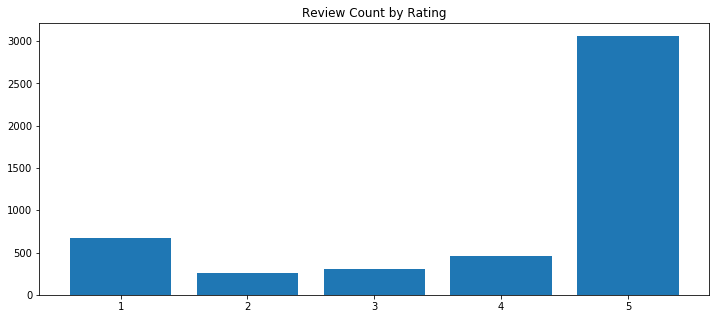

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(ratings.index, ratings.asin)
ax.set_title('Review Count by Rating');

### View average rating by ASIN

In [14]:
asin_ratings = reviews_df.groupby('asin').mean()

In [15]:
asin_ratings = asin_ratings.sort_values('rating')

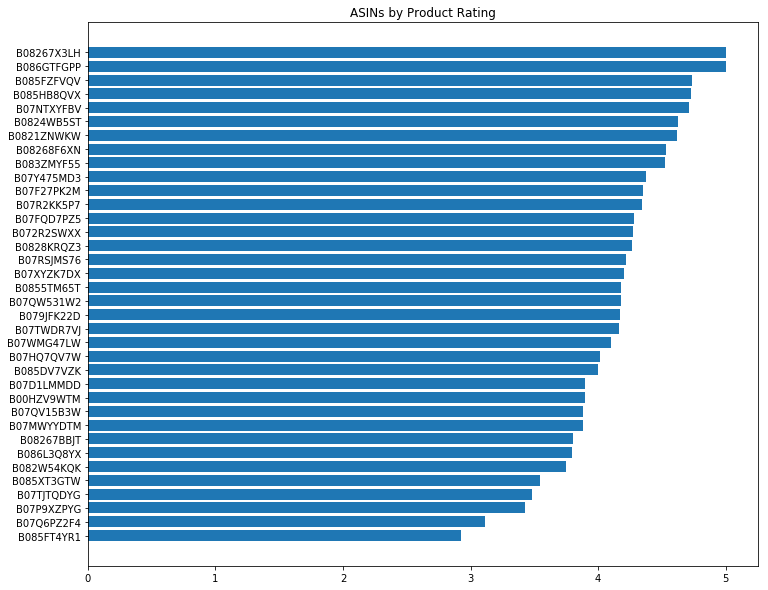

In [16]:
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(asin_ratings.index, asin_ratings.rating)
ax.set_title('ASINs by Product Rating');

### View Verified Purchase vs. Not Verified

In [17]:
verified = reviews_df.groupby('verified').count()

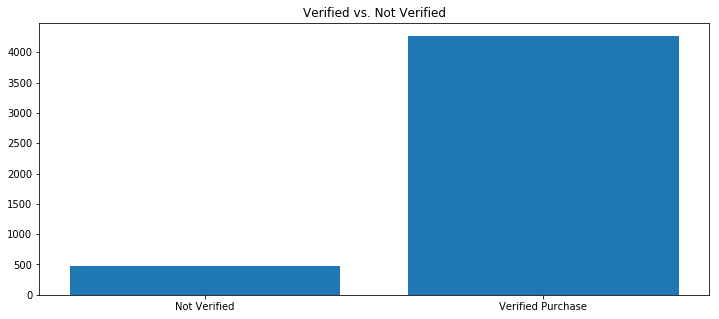

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(verified.index, verified.asin)
ax.set_title('Verified vs. Not Verified');

In [19]:
verified_dummy_copy = pd.get_dummies(reviews_df, columns=['verified'])

In [20]:
verified_ratings = verified_dummy_copy.groupby('rating').sum().rename(columns={'verified_Not Verified': 'not_verified', 'verified_Verified Purchase': 'verified'})
verified_ratings

,not_verified,verified
rating,,
1.0,67.0,606.0
2.0,28.0,229.0
3.0,33.0,268.0
4.0,61.0,393.0
5.0,287.0,2773.0


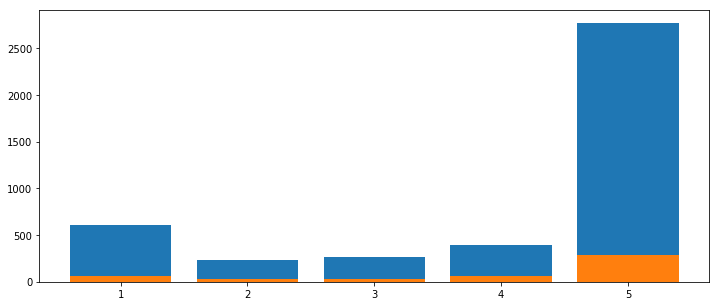

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(verified_ratings.index, verified_ratings.verified)
ax.bar(verified_ratings.index, verified_ratings.not_verified);

### Convert Date Strings to Datetime

In [22]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

In [23]:
reviews_df

,asin,product,date,verified,title,desc,reviewer_name,rating
0,B08267BBJT,Size: AAA,2020-08-11,Verified Purchase,"Didn't work, then worked, now don't work again",All I got in terms of use out of these batter...,Jasmine Carroll,1.0
1,B08267BBJT,Size: AAA,2020-07-30,Verified Purchase,These absolutely suck,I bought these for a wall mounted magnifying ...,Ashlee M.,1.0
2,B08268F6XN,Size: AA,2020-07-19,Verified Purchase,longer lasting battery for remote controller!!,i like the constant voltage and hopefully it ...,ARCHANGEL TROY,5.0
3,B08267BBJT,Size: AAA,2020-07-18,Verified Purchase,Minimal plastic in packaging.,"Just received these today, but I’m reviewing ...",ira,5.0
4,B08267BBJT,Size: AAA,2020-07-17,Verified Purchase,Not long enough battery life for a night hike,Shuts off suddenly in headlamp,T,3.0
...,...,...,...,...,...,...,...,...
1925,B00HZV9WTM,Style: BatteriesSize: AAA 8 Pack,2018-12-10,Verified Purchase,Batteries advertised as charged. Totally dead...,Totally dead when I received the batteries.,William M.,2.0
1926,B00HZV9WTM,Style: BatteriesSize: AA 4 Pack,2018-12-10,Verified Purchase,Great,Got the new silver ones. The older black labe...,David S.,5.0
1927,B00HZV9WTM,Style: BatteriesSize: AA 8 Pack,2018-12-10,Verified Purchase,Good batteries but quality control lacking,Out of 8 batteries in the pack i ordered ther...,Ethan Banks,5.0
1928,B00HZV9WTM,Style: BatteriesSize: AA 8 Pack,2018-12-09,Verified Purchase,Great battery,Solid performance,stangcolts,5.0


In [24]:
review_dates = reviews_df.groupby('date').count()

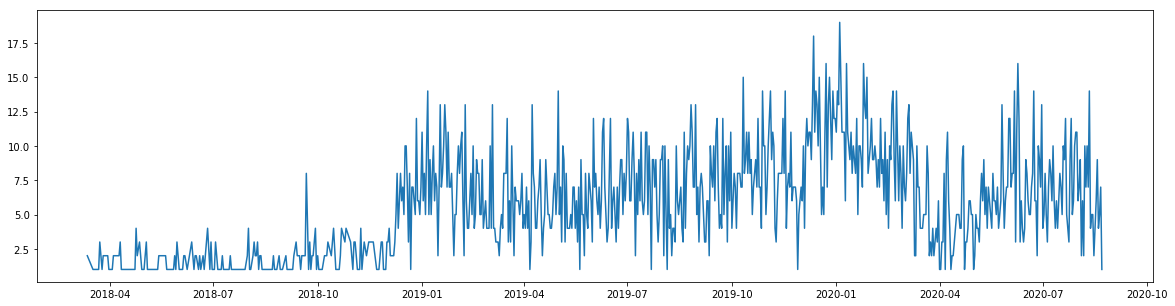

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(review_dates.index, review_dates.asin);

In [26]:
reviews_df['month'] = reviews_df['date'].apply(lambda x: x.month)

In [27]:
reviews_df['year'] = reviews_df['date'].apply(lambda x: x.year)
reviews_df['month_year'] = reviews_df['date'].dt.to_period('M')

In [28]:
month_year = reviews_df.groupby('month_year').count().reset_index()

In [29]:
month_year['month_year'] = month_year['month_year'].dt.to_timestamp()

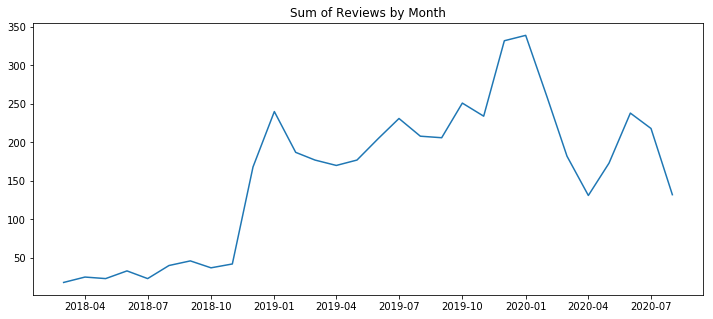

In [30]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(month_year.month_year, month_year.asin)
ax.set_title('Sum of Reviews by Month');

In [31]:
reviews_df

,asin,product,date,verified,title,desc,reviewer_name,rating,month,year,month_year
0,B08267BBJT,Size: AAA,2020-08-11,Verified Purchase,"Didn't work, then worked, now don't work again",All I got in terms of use out of these batter...,Jasmine Carroll,1.0,8,2020,2020-08
1,B08267BBJT,Size: AAA,2020-07-30,Verified Purchase,These absolutely suck,I bought these for a wall mounted magnifying ...,Ashlee M.,1.0,7,2020,2020-07
2,B08268F6XN,Size: AA,2020-07-19,Verified Purchase,longer lasting battery for remote controller!!,i like the constant voltage and hopefully it ...,ARCHANGEL TROY,5.0,7,2020,2020-07
3,B08267BBJT,Size: AAA,2020-07-18,Verified Purchase,Minimal plastic in packaging.,"Just received these today, but I’m reviewing ...",ira,5.0,7,2020,2020-07
4,B08267BBJT,Size: AAA,2020-07-17,Verified Purchase,Not long enough battery life for a night hike,Shuts off suddenly in headlamp,T,3.0,7,2020,2020-07
...,...,...,...,...,...,...,...,...,...,...,...
1925,B00HZV9WTM,Style: BatteriesSize: AAA 8 Pack,2018-12-10,Verified Purchase,Batteries advertised as charged. Totally dead...,Totally dead when I received the batteries.,William M.,2.0,12,2018,2018-12
1926,B00HZV9WTM,Style: BatteriesSize: AA 4 Pack,2018-12-10,Verified Purchase,Great,Got the new silver ones. The older black labe...,David S.,5.0,12,2018,2018-12
1927,B00HZV9WTM,Style: BatteriesSize: AA 8 Pack,2018-12-10,Verified Purchase,Good batteries but quality control lacking,Out of 8 batteries in the pack i ordered ther...,Ethan Banks,5.0,12,2018,2018-12
1928,B00HZV9WTM,Style: BatteriesSize: AA 8 Pack,2018-12-09,Verified Purchase,Great battery,Solid performance,stangcolts,5.0,12,2018,2018-12


In [32]:
unique_products = set(reviews_df['product'])

In [33]:
import re

renaming = {}
for p in unique_products:
    try:
        words = set(re.split(' |_|-|!|\*', p))
        print(words)
        if 'AAA' in words:
            renaming[p] = 'AAA'
        elif 'AA' in words:
            renaming[p] = 'AA'
        elif '9V' in words:
            renaming[p] = '9V'
        elif 'D' in words:
            renaming[p] = 'D'
        else:
            renaming[p] = 'Other'
    except:
        renaming[p] = 'Other'
renaming

{'(USB&Type', 'Cell', 'Charging)', 'D', 'Size:', 'C'}
{'Pack', 'AAA', '4', 'Size:'}
{'8pack', 'Size:'}
{'1850mAh', 'AA', '4', 'Size:'}
{'Style:', 'AAA', 'Pack', 'BatteriesSize:', '8'}
{'USB', 'ONLY', 'BATTERIES', 'Size:'}
{'C9010N', 'Charger', 'Size:'}
{'Style:', 'ChargerSize:', 'AA', 'Batteries', 'and', 'Pack', 'Battery', '8'}
{'AA', 'Size:'}
{'C9010N+4AA+4AAA', 'Size:'}
{'1500mAh', 'Charging', 'AA', 'W/USB', 'Size:', 'Cable'}
{'4', 'AAA', 'Charger', 'Pack', 'Size:', 'Lithium', 'w/USB'}
{'9V', '2', 'Size:'}
{'USB', 'AA', '2', 'Batteries', 'Size:', 'Lithium'}
{'Style:', '4', 'ChargerSize:', 'AA', 'Batteries', 'and', 'Pack', 'Battery'}
{'Style:', '4', 'AAA', 'Pack', 'BatteriesSize:'}
{'Only', 'Charger', 'Size:'}
{'Count', '2', '1)', '(Pack', 'Size:', 'of'}
{'4Pack', 'AA+AAA', 'Size:'}
{'1500mAh', 'AA', 'Charging)', '(USB', 'Size:'}
{'600mAh', 'AAA', '4', 'Size:'}
{'4', 'AA', 'Charger', 'Pack', 'Size:', 'Lithium', 'w/USB'}
{'1', '9V', 'Size:'}
{'Style:', '4', 'ChargerSize:', 'AAA', 'Batt

{'Size: D Cell (USB&Type C Charging)': 'D',
 nan: 'Other',
 'Size: AAA 4 Pack': 'AAA',
 'Size: 8pack': 'Other',
 'Size: 4*AA-1850mAh': 'AA',
 'Style: BatteriesSize: AAA 8 Pack': 'AAA',
 'Size: ONLY USB BATTERIES': 'Other',
 'Size: C9010N Charger': 'Other',
 'Style: Batteries and Battery ChargerSize: AA 8 Pack': 'AA',
 'Size: AA': 'AA',
 'Size: C9010N+4AA+4AAA': 'Other',
 'Size: AA-1500mAh W/USB Charging Cable': 'AA',
 'Size: AAA Lithium-4 Pack w/USB Charger': 'AAA',
 'Size: 2*9V': '9V',
 'Size: 2 USB Lithium AA Batteries': 'AA',
 'Style: Batteries and Battery ChargerSize: AA 4 Pack': 'AA',
 'Style: BatteriesSize: AAA 4 Pack': 'AAA',
 'Size: Only Charger': 'Other',
 'Size: 2 Count (Pack of 1)': 'Other',
 'Size: AA+AAA 4Pack': 'Other',
 'Size: AA 1500mAh (USB Charging)': 'AA',
 'Size: 4*AAA-600mAh': 'AAA',
 'Size: AA Lithium-4 Pack w/USB Charger': 'AA',
 'Size: 1*9V': '9V',
 'Style: Batteries and Battery ChargerSize: AAA 4 Pack': 'AAA',
 'Size: 16pack': 'Other',
 'Size: AAA 450mAh (USB C

In [34]:
reviews_df['product'] = reviews_df['product'].map(renaming)

In [35]:
reviews_df[reviews_df['product'] == 'Other']

,asin,product,date,verified,title,desc,reviewer_name,rating,month,year,month_year
968,B072R2SWXX,Other,2020-06-27,Verified Purchase,I'm impressed,"I haven't used them yet,the way they get char...",Amazon Customer,5.0,6,2020,2020-06
969,B072R2SWXX,Other,2020-06-08,Not Verified,The add that this seller is advertising is mis...,The add that this seller is advertising is mi...,Adisus,1.0,6,2020,2020-06
970,B072R2SWXX,Other,2020-06-06,Verified Purchase,very eazy,i loved these batteries so much i ended up ge...,Reid smolens,5.0,6,2020,2020-06
971,B072R2SWXX,Other,2020-04-08,Verified Purchase,Long charges,Surprising how long the batteries stay charged!!,Al,5.0,4,2020,2020-04
972,B072R2SWXX,Other,2020-04-07,Verified Purchase,Better then the rest,This is the best design in my opinion. It bea...,Derek Smith,5.0,4,2020,2020-04
...,...,...,...,...,...,...,...,...,...,...,...
15,B07WMG47LW,Other,2020-07-06,Verified Purchase,Bad for my son's toy,"I got it for about 2or3 months, it last very ...",Peter,1.0,7,2020,2020-07
16,B07WMG47LW,Other,2020-07-06,Verified Purchase,These batteries are adequate for moderate powe...,Since I have been using this batteries to pow...,Uncle Rick,3.0,7,2020,2020-07
17,B07WMG47LW,Other,2020-07-06,Verified Purchase,they work,Just what I wanted,Amazon Customer,5.0,7,2020,2020-07
18,B07WMG47LW,Other,2020-07-04,Verified Purchase,7 months and already dead,I have only had these for 7 months and alread...,krystl O,3.0,7,2020,2020-07


In [36]:
products = reviews_df.groupby('product').count()

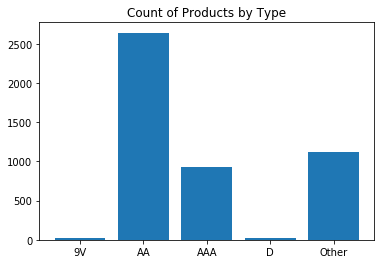

In [37]:
fig, ax = plt.subplots()
ax.bar(products.index, products.asin)
ax.set_title('Count of Products by Type');

In [38]:
reviews_df['title_desc'] = reviews_df['title'] + reviews_df['desc']

In [150]:
reviews_df = reviews_df.drop('str_desc', axis=1)

In [152]:
reviews_df.to_csv('cleaned_reviews.csv')

In [45]:
cleaned_desc = preprocess_corpus(list(reviews_df['title_desc']))

Didn't work, then worked, now don't work again All I got in terms of use out of these batteries were about three days of use out of two of them and have had no additional success. I bought them because I was bleeding through AAA batteries and was hoping the compact design would be better than something more bulky.Right out of the box, I charged them until the light was green indicating they were fully charged, tried to use them in a couple of devices and didn't have any luck. I was going to return them, but my friend suggested I switch from charging in an extension cord to directly in a wall socket. I thought that it did the trick, even though I thought that was silly, when I tried the batteries in a device after letting them charge overnight plugged directly into the wall socket, they did work, and worked well.About three days later, the device stopped working in the middle of high powered usage (hair trimmers). I swapped the batteries I had in there for the other two that had been ch

rechargeables with a magnetic cord, easy I have usb ports for charging in every room of my home so I find this type of battery convenient.  These are different though from some of the others I have that were micro usb.  These have a magnetic tip that just sticks to the positive of the battery.  Once the connections is made, they light up blue as they are charging.  You don't need to get out your glasses to charge these!!  If they do not last long, I will update this.
Worth the price. Almost all children's toys require batteries, and they have to be changed in a few days, which is too wasteful! With these rechargeable batteries, the USB interface can be directly charged separately, which is convenient, practical, and durable! Save more money!
Move aside NiMH, Lithium is here. While these batteries may seem a tad pricey, if you think about how many alkalines they will be replacing, it's a great value. The best part of these batteries is that they maintain their 1.5V throughout their char

Fantastic I use these to power my windows MR controllers.  The constant 1.5v allows the controllers to use more battery charge without low power warning turning off vibrations.  The batteries last a long time and recharge quickly, couldn't be happier.
Is not 1.5V What a waste. Does not have 1.5V output. Controller will not turn on with these batteries.
Holds a good charge Easy to charge. Seems to last considerably longer than standard alkaline batteries.
Liked so much ordered more! I waited a bit to write my review, to make sure they actually work! I’ll update, if anything changes. I have a television remote that eats batteries (a few other things as well). I ordered my first set during Prime Days for a great price. I liked them so well, I purchased another set a couple months later. I purchased the same brand even though they were a bit more because I know they work. I also purchased some AAA, although a different brand. I have been very happy. So much easier to recharge using a USB p

good for xbox contorller I bought it for an Xbox controller and it works good
BE CAREFUL! Do not use these in an AM radio!  The internal DC/DC converters make a ton of radio "hash" that makes AM radio listening impossible.  Does not seem to interfere with FM, though.
This is the future of batteries I don't know why this is only now a thing? I hate having dead batteries in my calculator, my iclicker, my presenter, or anything else I have to carry in my backpack but now I can just take them out and put them into my phone charger. The light at the end shows when it's charged and they actually charge pretty fast. I'll update this review once I can tell if they last as long as alkaline batteries but for right now so far so good.
Gets the job done. Works wonderful  just not so well in heavly used  items
Fast recharge Was a bit sceptical about this product but after my Amazon basics rechargeable batteries started to not charge I figured I'd try something new and unique. I wanted to get a few 

Best rechargeable batteries Use the batteries for different things, they work great. Easy to recharge.
Save Good
One dead One will not charge, so it was really a 3 pack, bummer
1.5 volt rechargeable AAA I rate these with five stars because they are a super nifty upgrade to most devices that require 1.5, 3.0, or 4.5 volts in 1, 2, or 3 series boxes.  Ni-Cad 1.2 volt cells have been disappointing me for years now and it is worth five stars to finally have a rechargeable 1.5 volt cell with depth. The only downside is that my old TV Listener wireless headphones don't like them. In this antique application they cause an unacceptable amount of RF interference. I only just got them so time will tell as to durability. They seem sturdy and well built. They charged right up (Not Pre-Charged. I don't care.).
Voltage stays relatively constant Unlike alkaline batteries, these keep a relatively constant voltage throughout it discharge cycle.  This makes these batteries very worthwhile...
Great batte

Long lasting I have used other rechargeable batteries before and these have held the charge for a lot longer! Very nice performance for outdoor use and varied temperature in a trail camera that is on 24 hours for months and they are excellent!
Bought Sept 2019, reviewing my past orders Reviewing as in, checking and making sure there aren't any orders I'm not familiar with.Anyways as for the batteries, using them in a logitech wireless mouse, haven't recharged them yet, I'm 1 month away from a full year without recharging so that's cool.I'll update if I remember or feel like it but as for the initial impressions go, 5 stars
Great charging set I am constantly trying to reduce my waste so I bought these so I could reuse batteries instead of just collecting the dead ones to eventually recycle one day. I got these for our Nintendo controllers for the kids instead of the disposable ones. So far, they work well, only take less than 2 hours for a full charge and can be used for quite a long ti

Lasts almost as long as traditional alkaline batteries. Using for my wireless mouse, works well so far. Does not last as long as traditional alkaline batteries, but that was expected
Worked I give it a try because it is 1.5V.  It should work better than NIMH battery (1.2V) for some device. I give it 4 star because I am still testing it. I am not sure how long the battery can last.
Dead after only recharging twice One of four dead after only 2nd cycles of recharging. For Lithium, you probably should never fully run it out or it will be bricked.
Subpar batteries for Camera Flash unit I bought these batteries for my godox flash unit thinking that these would work like the other flash units with lithium batteries. Unfortunately, when testing these fully charged batteries on my TT685 unit, it took 10 seconds to recahrge after the first test fire. A typical Sanyo Eneloop took about 2 seconds. Also when i took the Tenavolt batteries out after 2 test fires, the contacts on both sides almost bu

Good Good
Perfect Awesome recharging batteries. I wish I would’ve found these sooner.
Camera batteries Delivered on time and the charging was done quickly and the charge seems to be lasting. Very pleased.
Charge AAA & AA at the same time Perfect charger for the family. I like the way we can charge AA and AAA at the same time. And with one charger, not two. We go through a lot of batteries. This helps us be more green.
Very useful I really love but I didn't realize you can only use Powerball batteries.
Batteries last quite a long time after a charge. All batteries are good to go out of the box. Have gone through three cycles of discharging and charging of the batteries and have not experienced any issues.  Very pleased with the performance of the unit.
Short working time These are worse than buying cheap batteries from a flea market. I put them on charge as soon as I got them. They charged quickly.I put them in my 80 lumen headlamp and the only lasted about 10 minutes on full power. To 

Good rechargeable batteries. I have been using these for the past few months and I have experienced no problems with using them or charging them.
Nothing now came a going at a home on itself and rain made my camera well Nothing about came out good
Good stuff Worked great for my trx1 scanner.
Batteries have changed Something looked off with the packaging. Graphics slightly different. Now made in China, not Japan. Website still shows old art/products and tells me I have purchased this product 4 times in that past. Not these guys!
Impressed Love them. They've worked better and lasted longer than any others I've owned.
You Get What You Pay For There is a reason why they are much cheaper than the name brand... because they are. The charger indicated that they went bad, and they did. Meanwhile my Energizer Recharge are still going strong.
Great battery for the dollar Best bang for your buck. So far these have put the Panasonic, Duracell and Rayovac to shame.
Still Working I bought these batt

Overall power Value of use over nonrecarghables
Dependable These are fantastic. I've had them for over a year and they still work great with regular use. I use them on my Xbox One controller.
atencion Agradezco su correo pero les aclaro que lo que regrese fue del mismo pedido, los 30 paquetes de pilas AA con 8 cada paquete en total 240. EL IMPORTE A DEVOLVER ES POR $ 524.70 Dls. (30 x 17.49) por lo que agradeceré revisar lo devuelto.Ángel GuerraTENDRÁN EL ESTATUS DE NUESTRA DEVOLUCIÓN YA QUE A LA FECHA NO NOS HAN REGRESADO NUESTRO  FONDOS
We use the batteries religiously! No, seriously, we use them for all our microphones, instruments, etc for our band at church. We rarely drain them completely, but they are drained to about 50% and recharged frequently and seem to last a long time. Usually a battery lasts more than a year of usage like this before it won't charge anymore.
Rechargable. All batteries should be rechargable. These ones are all we have left now, as others have died off.
Ju

Not the size you expect. I bought these for my head lamp and it says that they are the same size... bs they are smaller than my headlamp... trash
battery juice it works
Good during short lifespan Average life, tends to rupture quickly.
Great Price Good price for this item
Good so Far Good Deal
Did not arrive charged nor would they recharge These batteries would not charge.
Great deal Use these for my flashlights. Not having to buy new batteries all the times save me a lot of money
Batteries stopped charing/working in 4 weeks Very disappointed the Amazon batteries have been a great value, but these batteries stopped charging/working agfter a few weeks. and I can't return them that makes all the worse
Awesome batteries use these in a walkie talkie. Charge them up and they last forever. Great shipping and great price
Blink security cameras we use these in our blink security cameras and they have been great.
Two thumbs up Great, long lasting batteries!
Used for Xbox one controller I've bee

In [91]:
str_desc = [" ".join(x) for x in cleaned_desc]

In [47]:
reviews_df['str_desc'] = str_desc

In [48]:
from collections import Counter
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidf_vectorized = tfidfvect.fit_transform(str_desc)
tfidf_vectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
nmf = NMF(n_components=5, random_state=1)

In [58]:
W = nmf.fit_transform(tfidf_vectorized)
H = nmf.components_

In [80]:
topics = ['latent_topic_{}'.format(i) for i in range(5)]
W = pd.DataFrame(W, index=reviews_df.str_desc, columns=topics)
W.sort_values('latent_topic_1', ascending=False)

,latent_topic_0,latent_topic_1,latent_topic_2,latent_topic_3,latent_topic_4
str_desc,,,,,
good good,0.000000,0.315647,0.000000,0.000000,0.000000
good good,0.000000,0.315647,0.000000,0.000000,0.000000
good good,0.000000,0.315647,0.000000,0.000000,0.000000
good good,0.000000,0.315647,0.000000,0.000000,0.000000
good good,0.000000,0.315647,0.000000,0.000000,0.000000
...,...,...,...,...,...
unbeatable get handsdown best battery ever purchase use primarily garrett max metal detector outlast every traditional battery tried including non rechargeable energizer etc ’ also noticed performance boost run continuously 15 v dead rather dropping slowly use deviceone thing know however device notify battery nearly dead still receive full 15v simply shut battery exhausted ready recharge,0.054659,0.000000,0.000000,0.000000,0.000000
great oculus quest controller 5 tiny elastic band brace keep sliding around work fantastic oculus quest controller fix tracking issue beat saber wish lasted longer work perfect right end theyre lighter normal aa also help keep sliding around controller swing fast centripetal force enough compress spring controller make positive end controller lose contact enough mess tracking split second annoying fix,0.014664,0.000000,0.012643,0.032791,0.014780
truly put full power need recharging used rechargeable battery ten year four month using tenavolts proven lasted longs rechargeable battery really put full power dead need recharged every rechargeable battery used two three day electric toothbrush would run noticeable slower fast enough tenavolts ran charged showed slowing three month,0.067078,0.000000,0.000000,0.000000,0.003784


In [94]:
def sort_latent_and_collect_articles(n, articles, w_):
    headlines = {}
    for i in range(n):
        sorted_df = w_.sort_values(f'latent_topic_{i}', ascending=False)
        headlines[f'latent_topic_{i}'] = list(sorted_df.index[:articles])
    return headlines

def get_popular_words(topics):
    latent_topics = {}
    total_word_count = Counter()
    for key, value in topics.items():
        words = ' '.join(topics[key]).lower().split()
        stop_words = set(stopwords.words('english'))
        filtered_words = []
        for word in words:
            if word not in stop_words:
                filtered_words.append(word)
        word_count = Counter(filtered_words)
        total_word_count += word_count
        first, second, third, fourth, fifth = word_count.most_common()[0][0], word_count.most_common()[1][0], word_count.most_common()[2][0], word_count.most_common()[3][0], word_count.most_common()[4][0]
        latent_topics[key] = [first, second, third, fourth, fifth]
    return latent_topics, total_word_count

In [95]:
top_obs = sort_latent_and_collect_articles(5, 30, W)

In [96]:
top_words, word_count = get_popular_words(top_obs)

In [97]:
top_words

{'latent_topic_0': ['battery', 'usb', 'aa', 'rechargeable', 'charging'],
 'latent_topic_1': ['good', 'battery', 'work', 'product', 'price'],
 'latent_topic_2': ['great', 'battery', 'product', 'value', 'work'],
 'latent_topic_3': ['work', 'well', 'great', 'good', 'battery'],
 'latent_topic_4': ['long', 'charge', 'last', 'time', 'hold']}

In [74]:
word_count

Counter({'battery': 34997,
         'pretty': 799,
         'cool': 419,
         'like': 3220,
         'rechargable': 520,
         'try': 477,
         'used': 2641,
         'couple': 604,
         'month': 1749,
         'last': 5340,
         'good': 7503,
         'charge': 11605,
         'quickly': 1144,
         'wa': 3416,
         'surprised': 188,
         'done': 310,
         'charging': 4102,
         'fasttime': 5,
         'tell': 463,
         'long': 4772,
         'far': 2469,
         'longevity': 467,
         'go': 1566,
         'year': 1408,
         'got': 1435,
         'incredibly': 44,
         'low': 927,
         'price': 1746,
         'couldnt': 115,
         'resist': 9,
         'trying': 190,
         'outthe': 5,
         'big': 354,
         'thing': 1038,
         'hold': 2393,
         'voltage': 1223,
         'around': 657,
         '15v': 830,
         'entire': 108,
         'use': 6545,
         'mean': 249,
         'drop': 250,
         '

In [87]:
reviews_df.head()

,asin,product,date,verified,title,desc,reviewer_name,rating,month,year,month_year,title_desc,str_desc
0,B08267BBJT,AAA,2020-08-11,Verified Purchase,"Didn't work, then worked, now don't work again",All I got in terms of use out of these batter...,Jasmine Carroll,1.0,8,2020,2020-08,"Didn't work, then worked, now don't work again...",didnt work worked dont work got term use batte...
1,B08267BBJT,AAA,2020-07-30,Verified Purchase,These absolutely suck,I bought these for a wall mounted magnifying ...,Ashlee M.,1.0,7,2020,2020-07,These absolutely suck I bought these for a wal...,absolutely suck bought wall mounted magnifying...
2,B08268F6XN,AA,2020-07-19,Verified Purchase,longer lasting battery for remote controller!!,i like the constant voltage and hopefully it ...,ARCHANGEL TROY,5.0,7,2020,2020-07,longer lasting battery for remote controller!!...,longer lasting battery remote controller like ...
3,B08267BBJT,AAA,2020-07-18,Verified Purchase,Minimal plastic in packaging.,"Just received these today, but I’m reviewing ...",ira,5.0,7,2020,2020-07,Minimal plastic in packaging. Just received th...,minimal plastic packaging received today ’ rev...
4,B08267BBJT,AAA,2020-07-17,Verified Purchase,Not long enough battery life for a night hike,Shuts off suddenly in headlamp,T,3.0,7,2020,2020-07,Not long enough battery life for a night hike ...,long enough battery life night hike shuts sudd...


In [88]:
negative = reviews_df[reviews_df['rating'] < 3.0]

In [133]:
negative

,asin,product,date,verified,title,desc,reviewer_name,rating,month,year,month_year,title_desc,str_desc
0,B08267BBJT,AAA,2020-08-11,Verified Purchase,"Didn't work, then worked, now don't work again",All I got in terms of use out of these batter...,Jasmine Carroll,1.0,8,2020,2020-08,"Didn't work, then worked, now don't work again...",didnt work worked dont work got term use batte...
1,B08267BBJT,AAA,2020-07-30,Verified Purchase,These absolutely suck,I bought these for a wall mounted magnifying ...,Ashlee M.,1.0,7,2020,2020-07,These absolutely suck I bought these for a wal...,absolutely suck bought wall mounted magnifying...
7,B08267BBJT,AAA,2020-07-01,Verified Purchase,Energy Storage Is Less Than 1/4 Normal Batteries.,"They do charge quickly, but at what price? It...",Brent R.,1.0,7,2020,2020-07,Energy Storage Is Less Than 1/4 Normal Batteri...,energy storage le 14 normal battery charge qui...
8,B08267BBJT,AAA,2020-06-28,Verified Purchase,Poor Quality - Unreliable,I had high hopes for these batteries because ...,Christian D.,1.0,6,2020,2020-06,Poor Quality - Unreliable I had high hopes for...,poor quality unreliable high hope battery desi...
24,B08267BBJT,AAA,2020-03-30,Verified Purchase,Beware! My order was incomplete,"The batteries arrived, but without the advert...",Waneiac,1.0,3,2020,2020-03,Beware! My order was incomplete The batteries ...,beware order wa incomplete battery arrived wit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,B00HZV9WTM,AA,2018-12-13,Verified Purchase,they die so fast,i am re-writing this review because it is far...,Kinzuko,1.0,12,2018,2018-12,they die so fast i am re-writing this review b...,die fast rewriting review far worse thought or...
1917,B00HZV9WTM,AA,2018-12-12,Verified Purchase,Nothing.,We put these in an LED light and nothing happ...,Skipper,1.0,12,2018,2018-12,Nothing. We put these in an LED light and noth...,nothing put led light nothing happened checked...
1918,B00HZV9WTM,AA,2018-12-12,Verified Purchase,Would not work for Medical Electric Stimulator...,"Surprisingly, these Rechargeable Batteries ch...",Humble Human,2.0,12,2018,2018-12,Would not work for Medical Electric Stimulator...,would work medical electric stimulator voltage...
1921,B00HZV9WTM,AA,2018-12-12,Verified Purchase,all batteries ship had 1/3 life...in other wor...,all batteries ship had 1/3 life...in other wo...,Maria,1.0,12,2018,2018-12,all batteries ship had 1/3 life...in other wor...,battery ship 13 lifein word dead battery ship ...


In [134]:
negative_desc = list(negative['str_desc'])

In [135]:
negative_tfidfvect = TfidfVectorizer()
neg_tfidf_vectorized = tfidfvect.fit_transform(negative_desc)
neg_tfidf_vectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [136]:
neg_nmf = NMF(n_components=5, random_state=5)

In [137]:
neg_W = neg_nmf.fit_transform(neg_tfidf_vectorized)
neg_H = neg_nmf.components_

In [138]:
neg_topics = ['latent_topic_{}'.format(i) for i in range(5)]

In [139]:
neg_W = pd.DataFrame(neg_W, index=negative.str_desc, columns=neg_topics)

In [141]:
neg_W

,latent_topic_0,latent_topic_1,latent_topic_2,latent_topic_3,latent_topic_4
str_desc,,,,,
didnt work worked dont work got term use battery three day use two additional success bought wa bleeding aaa battery wa hoping compact design would better something bulkyright box charged light wa green indicating fully charged tried use couple device didnt luck wa going return friend suggested switch charging extension cord directly wall socket thought trick even though thought wa silly tried battery device letting charge overnight plugged directly wall socket work worked wellabout three day later device stopped working middle high powered usage hair trimmer swapped battery two charging entire time didnt work went bought regular aaa battery device went back working fine tried battery device arent working seems work enough convince work stop workingi dont often leave feedback product felt wa important say would recommend anyone buy battery totally faulty least completely inconsistent youd better buying disposable,0.108376,0.000000,0.000000,0.000000,0.184726
absolutely suck bought wall mounted magnifying mirror ha led light would think shouldnt sucking immense amount power turn mirror long enough check makeup apply mascara get 3 us 510 minute piece die recharged opening mirror remove pita im pleased,0.025897,0.001476,0.000000,0.030680,0.003398
energy storage le 14 normal battery charge quickly price seems quick charge due fact total amount energy stored battery must low tested efficient led flashlight expecting get 8 hour low setting normal battery got hour half returning product,0.085976,0.028896,0.000000,0.000000,0.000000
poor quality unreliable high hope battery design great concept however wa disappointed charged battery placed flashlight found two battery quit working minute amazon offered send replacement yet still issue second batch tried using set several different flashlight experienced much worse performance compared generic aaa battery bought grocery store seen someone else write similar experience lead believe common problem,0.105911,0.000000,0.015011,0.000000,0.007877
beware order wa incomplete battery arrived without advertised charging unit doesnt good rechargeable battery without charger hopefully company see right thing ill advise people look update3302020w,0.071045,0.000000,0.003965,0.002788,0.004850
...,...,...,...,...,...
die fast rewriting review far worse thought originallyi got save cash battery vr headset controller unfortunately controller tell battery brink death full charge battery last around 2 hour top quittingi also found couple day part one battery started peeling awaythe last straw wa month using decided try energizer controller low behold registered full charge wa able play 2 hour honestly cant even see useful something low power tv remote,0.092651,0.016360,0.000000,0.062831,0.000000
nothing put led light nothing happened checked connection checked alignment nothing thought maybe werent precharged indicated put charger 10 hour turned green put freshly charged battery light nothing much power set breakfast sausage,0.058005,0.000000,0.000000,0.000000,0.021748
would work medical electric stimulator voltage low maybe surprisingly rechargeable battery charge 14 volt would work medical electric stimulator used several set rechargeable battery stimulator since got unit several year ago never trouble battery unit even come assume brand battery slightly higher voltage nothing else make sense,0.073342,0.000712,0.000000,0.000000,0.058983


In [145]:
neg_W.sort_values('latent_topic_0', ascending=False)

,latent_topic_0,latent_topic_1,latent_topic_2,latent_topic_3,latent_topic_4
str_desc,,,,,
battery would charge second time charged battery good short period time 3 hour use device usually last 48 hour use regular battery tried charging battery wouldnt charge light stayed red overnight rechargeable battery charged ebl charger battery clearly rubbish would caution buying product better one,0.176640,0.015173,0.000000,0.029358,0.010096
battery ’ hold charge battery drain even use period couple day never buy ebl brand purchased two separate occasion thought first wa bad batch apparently save money buy another brandthe charger ok though little slowedit080720 manufacturer recommended charge discharge battery 3 time build capacity went bought btc2400 battery charger analyzer great device btw followed manufacturer instruction went discharge refresh cycle analyzer mah battery wa rated 2800 highest got wa 2135 one 12 battery around half rated value 4 week shelf got value 29v 127v battery absolutely useless run ebt battery waste money also commented charger ’ bad well getting real charger realize bad provided charger wa ’ bad battery seller sent replacement battery case one defective wa wonderful thing bad quite frankly amazon bacics rechargeables much better battery therefore much better buy thanks support ebt product quality standard set foreign brand,0.164576,0.018239,0.001051,0.000000,0.006665
quirky reliable good experience aa battery rechargeable usb decided try aaa battery look wellmade recharge fine using usb port however dependable used two different device three installed motion detecting night light light worked well initially soon began strobe flicker even motion wa detected would quickly discharge battery although could recharged full charge shown battery tester recharged tested battery found one wa defective put three good battery back nightlight got strobe effect recharged battery put two small led flashlight flashlight worked well became noticeably warm flashlight popped died examined flashlight found evidence damage put two alkaline battery flashlight worked well aaa battery listed working flashlight might quirk battery chip ordered set eneloop aaa battery worked well past,0.149978,0.000000,0.000000,0.000000,0.022003
careful battery larger regular aa battery battery work device fatter regular aa battery maglite flashlight battery fit regular aa battery brand rechargeables slide right flashlight amazon one wont even go tube would afraid use device battery go tightness might able get device battery go slot would probably fine,0.149397,0.000000,0.000000,0.000000,0.032537
essentially single use battery poor quality recently bought battery electric holiday candle successfully charged battery ’ first use one use 2 8 battery would charge ’ never problem rechargeable battery ’ recommend wasting money,0.149032,0.007976,0.000000,0.000000,0.006687
...,...,...,...,...,...
dont like worth price doe last recharged,0.000000,0.022161,0.000568,0.174633,0.039622
used made japan recent batch made china,0.000000,0.000000,0.407726,0.000000,0.000000
duration charged much dont last long rechargeable battery last month last day use security system wont last long,0.000000,0.000000,0.000000,0.365517,0.000000


In [146]:
neg_top_obs = sort_latent_and_collect_articles(5, 30, neg_W)
neg_top_words, neg_word_count = get_popular_words(neg_top_obs)

In [147]:
neg_top_words

{'latent_topic_0': ['battery', 'charge', 'charger', 'use', 'one'],
 'latent_topic_1': ['charge', 'hold', 'battery', 'doe', 'dont'],
 'latent_topic_2': ['made', 'china', 'japan', 'battery', 'amazon'],
 'latent_topic_3': ['last', 'long', 'battery', 'charge', 'dont'],
 'latent_topic_4': ['work', 'battery', '’', 'dont', 'charged']}

In [148]:
neg_word_count

Counter({'battery': 270,
         'would': 29,
         'charge': 132,
         'second': 12,
         'time': 32,
         'charged': 32,
         'good': 28,
         'short': 4,
         'period': 2,
         '3': 8,
         'hour': 14,
         'use': 40,
         'device': 23,
         'usually': 2,
         'last': 74,
         '48': 1,
         'regular': 10,
         'tried': 17,
         'charging': 16,
         'wouldnt': 4,
         'light': 15,
         'stayed': 1,
         'red': 4,
         'overnight': 2,
         'rechargeable': 17,
         'ebl': 3,
         'charger': 40,
         'clearly': 1,
         'rubbish': 1,
         'caution': 1,
         'buying': 8,
         'product': 16,
         'better': 12,
         'one': 38,
         '’': 39,
         'hold': 66,
         'drain': 2,
         'even': 14,
         'couple': 7,
         'day': 16,
         'never': 5,
         'buy': 21,
         'brand': 10,
         'purchased': 11,
         'two': 21,
         '